# Exploratory Analysis of The Housing Market In Västra Götaland (Sweden)

Our data has now been scraped and cleaned but now needs to be analysed in order to attempt to provide further information on the starting and final prices for our chosen location over the last 12 months. It will be also valuable to compare our target areas with other areas of Västra Götaland.

We will aim to answer the following questions:

- What is the average and median price difference across the different areas of Västra Götaland?
- What is the average and median sale price for each area in Västra Götaland?
- Has the average price increased or decreased over the last 12 months?
- Has the average price difference between the starting price and closing price increased or decreased over the last 12 months?

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


pd.set_option('max_rows',600)
pd.set_option('display.float_format', lambda x: '%.0f' % x)
# pd.reset_option('display.float_format') #if want to change back as set_option works globally on juypter notebooks

In [28]:
df = pd.read_csv('house_prices_cleaned.csv')
df['date_sold'] = pd.to_datetime(df['date_sold'])
df = df.set_index('date_sold')
df = df.drop(columns='Unnamed: 0',axis = 1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2181 entries, 2020-06-25 to 2019-06-26
Data columns (total 11 columns):
adress            2181 non-null object
house_type        2181 non-null object
biarea_msq        1560 non-null object
sold_price_kr     2181 non-null int64
price_diff_%      2181 non-null int64
agent             2181 non-null object
size_msq          2181 non-null float64
rooms             2175 non-null float64
omrade            2181 non-null object
kommun            2181 non-null object
utgangspris_kr    2181 non-null int64
dtypes: float64(2), int64(3), object(6)
memory usage: 204.5+ KB


In [30]:
df.describe()

,sold_price_kr,price_diff_%,size_msq,rooms,utgangspris_kr
count,2181,2181,2181,2175,2181
mean,2822550,7,127,5,2695186
std,649340,14,40,1,727920
min,1750000,-69,4,4,950000
25%,2300000,-1,103,4,2100000
50%,2800000,4,122,5,2675000
75%,3395000,13,146,6,3250000
max,4000000,111,505,18,6875000


The max values have been checked and nothing resembles and erroneous value

## What is the average and median price difference across the different areas of Västra Götaland?

In [31]:
df.head()

,adress,house_type,biarea_msq,sold_price_kr,price_diff_%,agent,size_msq,rooms,omrade,kommun,utgangspris_kr
date_sold,,,,,,,,,,,
2020-06-25,Västra Mjörnvägen 62,Vinterbonat fritidshus,NaN,3650000,46,Gofab Fastighetsbyrå,81,5,Tjörn,Tjörn,2500000
2020-06-24,Södra Moränvägen 40,Villa,64,3600000,13,Fastighetsbyrån,219,6,Ed,Dals-Ed,3175000
2020-06-24,Röds höjd 134,Villa,75,2450000,-6,Fastighetsbyrån,100,5,Svenshögen,Stenungsund,2600000
2020-06-24,Lugnås Magnilund 1,Villa,8,1920000,28,Fastighetsbyrån,79,5,Lugnås,Mariestad,1500000
2020-06-24,Sågdammsvägen 9,Villa,NaN,3850000,7,Fastighetsbyrån,87,4,Landvetter,Härryda,3600000


In [32]:
df['kommun'].value_counts()

Borås          205
Uddevalla      165
Skövde          98
Trollhättan     94
Lilla Edet      94
Göteborg        89
Ale             87
Alingsås        87
Mark            86
Vänersborg      85
Lidköping       80
Kungälv         75
Lerum           71
Tjörn           62
Falköping       60
Orust           57
Mariestad       45
Tanum           45
Stenungsund     44
Lysekil         44
Härryda         39
Ulricehamn      38
Strömstad       38
Bollebygd       37
Hjo             36
Skara           30
Vårgårda        30
Mölndal         27
Sotenäs         26
Götene          20
Herrljunga      19
Tibro           18
Vara            18
Tidaholm        18
Tranemo         15
Åmål            13
Munkedal        12
Karlsborg       12
Töreboda         9
Svenljunga       9
Grästorp         8
Mellerud         7
Öckerö           6
Dals-Ed          6
Bengtsfors       5
Färgelanda       4
Essunga          4
Partille         3
Gullspång        1
Name: kommun, dtype: int64

### Mean 

In [33]:
#Average price by kommun pivot table with added column for sample size
pivot = df.pivot_table(index='kommun', aggfunc = 'mean')
pivot['sample_size'] = df['kommun'].value_counts()
pivot = pivot.sort_values('sold_price_kr', ascending=False)
pivot

,price_diff_%,rooms,size_msq,sold_price_kr,utgangspris_kr,sample_size
kommun,,,,,,
Öckerö,8,6,136,3615833,3379167,6
Göteborg,0,5,112,3544774,3646629,89
Mölndal,3,5,106,3413889,3340741,27
Kungälv,-0,5,118,3317017,3428000,75
Lerum,4,5,117,3235789,3139085,71
Stenungsund,2,5,128,3218068,3171023,44
Partille,16,4,86,3186667,2775000,3
Alingsås,7,5,129,3157460,2982471,87
Ale,7,5,116,3096494,2926724,87


### Median

In [34]:
pivot = df.pivot_table(index='kommun', aggfunc = np.median)
pivot['sample_size'] = df['kommun'].value_counts()
pivot = pivot.sort_values('sold_price_kr', ascending=False)
pivot

,price_diff_%,rooms,size_msq,sold_price_kr,utgangspris_kr,sample_size
kommun,,,,,,
Göteborg,2,5,119,3650000,3575000,89
Mölndal,0,4,102,3600000,3375000,27
Kungälv,0,5,115,3495000,3500000,75
Öckerö,8,6,127,3472500,3462500,6
Alingsås,5,5,130,3350000,3150000,87
Lerum,2,5,112,3316000,3250000,71
Stenungsund,0,6,128,3297500,3000000,44
Partille,15,4,87,3200000,2475000,3
Trollhättan,6,5,128,3100000,2825000,94


We find that there are as expected large variations in the price difference for kommuns which have small sample sizes which is to be expected. From glancing over the data, we can see that kommuns with larger sample sizes have a median price difference in the 0 - 10 % over sale price. This is an optimistic assessment which suggests that when looking at potential houses, a 10% increase over the initial to market price is to be expected. Of course there are a large amount of variables which will affect the final sale price and further analysis is required to find if a specific area in our target location is more attractive and affected the average/median price difference.

## Target Kommun - Lerum

Our ideal location is Lerum and the surrounding villages, so we will drill deeper into the sale prices for the kommun.

The Lerum kommun dataset consists of 71 houses sold over the last year. We will now look to find the most attractive area for our chosen housetype.

In [35]:
df_lerum = df[df['kommun'] == 'Lerum']
df_lerum

,adress,house_type,biarea_msq,sold_price_kr,price_diff_%,agent,size_msq,rooms,omrade,kommun,utgangspris_kr
date_sold,,,,,,,,,,,
2020-06-18,Alehöjd 3,Villa,NaN,3325000,-1,Fastighetsbyrån,112,4,Stenkullen,Lerum,3350000
2020-06-16,Betesvägen 4,Villa,2,3700000,-1,Fastighetsbyrån,149,6,Gråbo - Centralt,Lerum,3725000
2020-06-16,Drögvägen 6,Villa,26,2650000,0,Svensk Fastighetsförmedling,113,5,Hjällsnäs,Lerum,2650000
2020-06-03,Prästkragsvägen 44,Villa,140,4000000,7,Fastighetsbyrån,118,8,Floda - Hästhagen,Lerum,3750000
2020-05-22,Konvaljvägen 4,Villa,16,3150000,6,Fastighetsbyrån,121,5,Gråbo,Lerum,2975000
2020-05-20,Krokusvägen 9,Villa,88,3575000,13,Fastighetsbyrån,98,7,Gråbo - Olstorp,Lerum,3175000
2020-05-20,Kälkvägen 16,Villa,1,2610000,11,Fastighetsbyrån,141,5,Gråbo - Centralt,Lerum,2350000
2020-05-17,Målögavägen 22,Villa,90,3600000,11,Svensk Fastighetsförmedling,130,6,Gråbo,Lerum,3250000
2020-05-14,Gatan 7,Villa,NaN,2450000,0,Bjurfors,82,4,Tollered,Lerum,2450000


In [36]:
#The 'omrade' column requires further cleaning as the descriptions are too granula for our analyis.
temp_df = df_lerum['omrade'].str.replace('-', ' ').str.split(' ', expand=True)
temp_df.columns = ['omrade_new','1','2','3']
temp_df = temp_df.drop(['1','2','3'], axis=1)
df_lerum = df_lerum.merge(temp_df, how='inner', left_index = True, right_index=True)
df_lerum = df_lerum.drop('omrade', axis=1)
df_lerum


,adress,house_type,biarea_msq,sold_price_kr,price_diff_%,agent,size_msq,rooms,kommun,utgangspris_kr,omrade_new
date_sold,,,,,,,,,,,
2019-06-27,Hagens väg 9,Villa,72,2475000,0,Fastighetsbyrån,120,6,Lerum,2475000,Sjövik
2019-07-18,Södra Ytterstadvägen 22,Villa,70,1900000,6,Fastighetsbyrån,85,4,Lerum,1800000,Gråbo
2019-08-07,Björbokroken 5,Villa,NaN,2590000,0,Bjurfors,96,4,Lerum,2600000,Gråbo
2019-08-14,Södra Nääsgränsvägen 16,Villa,110,3950000,8,Fastighetsbyrån,110,5,Lerum,3650000,Floda
2019-08-22,Sparvvägen 15,Villa,36,3975000,0,Fastighetsbyrån,110,4,Lerum,3975000,Lerum
2019-08-23,Monvägen 108,Villa,63,3200000,2,Mäklarhuset,132,6,Lerum,3125000,Gråbo
2019-08-25,Ekarnas väg 40,Villa,48,3000000,-6,Svensk Fastighetsförmedling,152,6,Lerum,3200000,Sjövik
2019-08-27,Rättaregårdsvägen 3,Villa,54,1800000,0,Fastighetsbyrån,108,5,Lerum,1800000,Sjövik
2019-08-27,Rättaregårdsvägen 3,Villa,54,1800000,0,Fastighetsbyrån,108,5,Lerum,1800000,Gråbo


## Lerum Kommun Mean House Prices

In [37]:
lerum_pivot = df_lerum.pivot_table(index='omrade_new', aggfunc = 'mean')
lerum_pivot['sample_size'] = df_lerum['omrade_new'].value_counts()
lerum_pivot = lerum_pivot.sort_values('sold_price_kr', ascending=False)
lerum_pivot

,price_diff_%,rooms,size_msq,sold_price_kr,utgangspris_kr,sample_size
omrade_new,,,,,,
Slätthult,-9,4,143,4000000,4400000,1
Öxeryd,6,6,126,3850000,3637500,2
Uddared,6,6,130,3816667,3591667,3
Höjden,2,4,110,3712500,3637500,2
Aggetorp,3,5,125,3600000,3500000,1
Centralt,9,7,131,3556667,3275000,3
Floda,3,6,114,3543182,3447727,11
Lerum,4,5,105,3542167,3433333,12
Hallsås,-6,5,100,3300000,3500000,1


## Lerum Kommun Median House Prices

In [38]:
lerum_pivot = df_lerum.pivot_table(index='omrade_new', aggfunc = np.median)
lerum_pivot['sample_size'] = df_lerum['omrade_new'].value_counts()
lerum_pivot = lerum_pivot.sort_values('sold_price_kr', ascending=False).reset_index()
lerum_pivot

,omrade_new,price_diff_%,rooms,size_msq,sold_price_kr,utgangspris_kr,sample_size
0,Slätthult,-9,4,143,4000000,4400000,1
1,Öxeryd,6,6,126,3850000,3637500,2
2,Uddared,7,5,139,3800000,3500000,3
3,Höjden,2,4,110,3712500,3637500,2
4,Centralt,12,7,137,3650000,3250000,3
5,Floda,1,6,110,3650000,3600000,11
6,Aggetorp,3,5,125,3600000,3500000,1
7,Lerum,3,5,100,3530000,3350000,12
8,Hallsås,-6,5,100,3300000,3500000,1
9,Björboholm,3,4,118,3275000,3200000,4


In [39]:
lerum_pivot['sample_size'].sum()

89

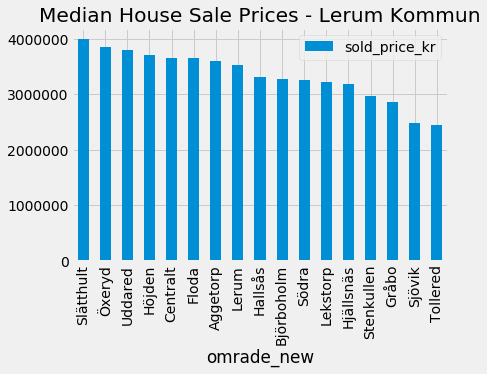

In [40]:
plt.style.use('fivethirtyeight')
lerum_pivot.plot.bar(x= 'omrade_new', y='sold_price_kr', title='Median House Sale Prices - Lerum Kommun')


Lerum, stenkullen, gråbo and floda.

Text(0.5, 0.98, 'Variance Analysis')

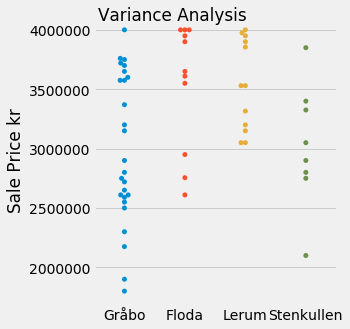

In [41]:
areas = ['Lerum', 'Stenkullen', 'Gråbo', 'Floda']
lerum_select_areas = df_lerum[df_lerum['omrade_new'].isin(areas)]
g = sns.catplot(x = 'omrade_new', y = 'sold_price_kr', kind = 'swarm', data = lerum_select_areas)
g.set_axis_labels("", "Sale Price kr")
g.fig.suptitle('Variance Analysis')
                        

Text(0.5, 0.98, 'Price Difference Variance By Area')

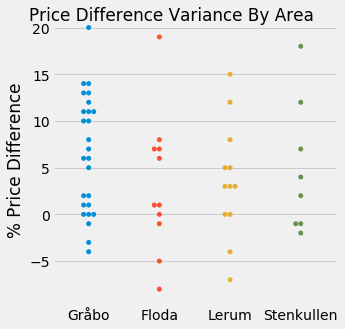

In [42]:
g = sns.catplot(x = 'omrade_new', y = 'price_diff_%', kind = 'swarm', data = lerum_select_areas)
g.set_axis_labels("", "% Price Difference")
g.fig.suptitle('Price Difference Variance By Area')

### Findings

Gråbo is one for the cheaper areas in Lerumskommun and an area worth looking into further. As one would expect, areas further away from the train and motorway and time to Gothenburg are cheaper. Having plotted the sale prices below for largest areas in the kommun, we can see that Gråbo has had a larger number of sale prices below 3,000,000kr whereas Lerum which would be considered the most popular area in the kommun, no sale prices below 3,000,000kr.

We can therefore adjust our expectations when looking at houses in our price range in Lerum. The data would also suggest that greater value can be expected in Gråbo if accounting for the less desirable location.

The price difference is as expected positive and nearly all datapoints fall below the 15%.

NOTE: The sample size reduces dramatically as we become more granula and will therefore be open to the law of large number variances.






## Next Steps

We have only focused on our chosen kommun and further analysis could of course be made for different areas of Västra Götaland.

We will now turn our attention to how data changes temporally. We would like to know which months are more liquid and whether there is an optimal sale month for our target housetype. We will initally analyse data for the region before moving to our chosen kommun.

An inital theory is house sales between January and April are preferred as this would allow for a summer moving date, as as such houses at the start of the year should have a larger price increase. The inverse of this is that there is a popular time of year to sell houses which means that supply is greater and reduces final sale prices. Let's find out if our data can explain this.


Next Steps:

An analysis of price_diff by month.

## Price Difference By Month

### Västra Götaland

In order to analayse our data by month, we first need to resample the data so we have a monthly mean which can then be plotted. We will do this using the resample() method. A datetime index is required for this method which is why we have set the index to date sold, and removed the original index using "drop" earlier in our notebook.



In [43]:
df_monthly = df.resample('M').mean()
df_count = df.resample('M').count()
df_monthly['num_houses_sold'] = df_count['adress']
df_monthly.head(20)


,sold_price_kr,price_diff_%,size_msq,rooms,utgangspris_kr,num_houses_sold
date_sold,,,,,,
2019-06-30,2751970,6,118,5,2639394,33
2019-07-31,2646886,6,124,5,2552857,140
2019-08-31,2809727,9,124,5,2623636,165
2019-09-30,2791624,7,134,6,2637217,221
2019-10-31,2721772,7,125,5,2585560,232
2019-11-30,2852921,6,127,5,2722191,178
2019-12-31,2839418,3,134,5,2842582,91
2020-01-31,2881530,6,132,5,2758219,146
2020-02-29,2745719,8,125,5,2617407,135


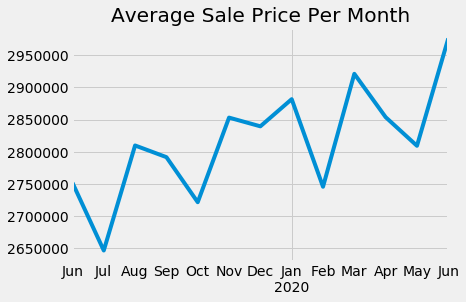

In [44]:
#Plotting our Monthly Price Data
plt.style.use('fivethirtyeight')

df_monthly.plot(y = 'sold_price_kr', title = "Average Sale Price Per Month", legend=None)
plt.xlabel('')
plt.show()

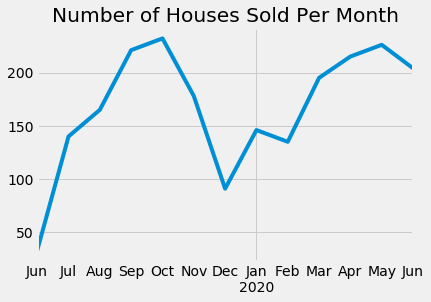

In [45]:
df_monthly.plot(y = 'num_houses_sold', title = "Number of Houses Sold Per Month", legend=None)
plt.xlabel('')
plt.show()

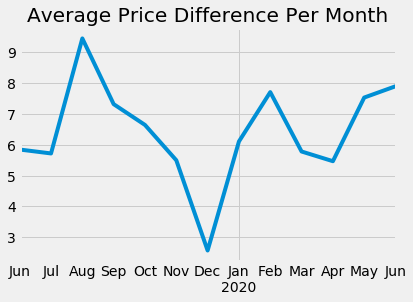

In [46]:
df_monthly.plot(y = 'price_diff_%', title = "Average Price Difference Per Month", legend=None)
plt.xlabel('')
plt.show()

## Price Change Per Month

We want to look at the percentage change in average sale prices over the year. To do this we will use the following formula 

(new/old)/old *100

Instead of doing this manually, we can use the df.pct_change() function.





In [47]:
pd.reset_option('display.float_format')
percent_change = df_monthly.pct_change()
percent_change

,sold_price_kr,price_diff_%,size_msq,rooms,utgangspris_kr,num_houses_sold
date_sold,,,,,,
2019-06-30,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-31,-0.038185,-0.021725,0.051361,0.071833,-0.032787,3.242424
2019-08-31,0.061522,0.652480,-0.001806,0.030387,0.027725,0.178571
2019-09-30,-0.006443,-0.225635,0.081039,0.061235,0.005176,0.339394
2019-10-31,-0.025022,-0.092158,-0.066412,-0.064206,-0.019588,0.049774
2019-11-30,0.048185,-0.172503,0.015359,0.015268,0.052844,-0.232759
2019-12-31,-0.004733,-0.532468,0.055563,0.020010,0.044226,-0.488764
2020-01-31,0.014831,1.375951,-0.012862,-0.009999,-0.029678,0.604396
2020-02-29,-0.047132,0.262133,-0.057810,-0.036872,-0.051052,-0.075342


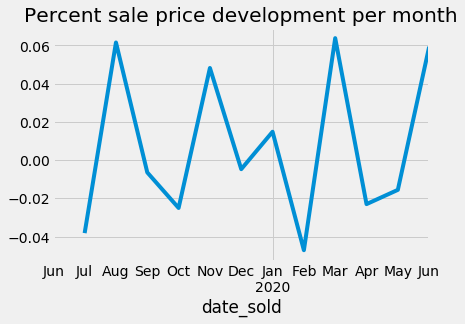

In [48]:
percent_change.plot(y='sold_price_kr', title = 'Percent sale price development per month', legend=None)

Whilst this was fun to plot, it doesn't really add anything to our analysis!

## Correlation matrix

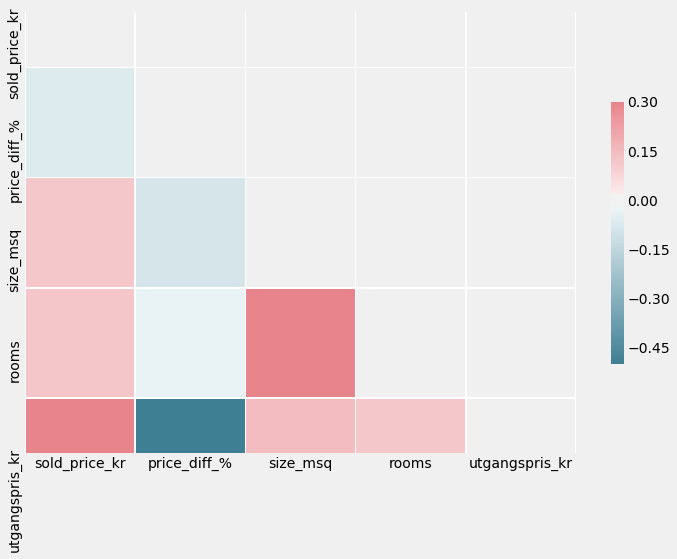

In [51]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Our correlation matrix hasn't added any further insights to our analysis.


## Conclusion

This project has been a useful exercise in:
- Web scraping data
- Data cleaning
- Data analysis and visualisation

There are a large number of different avenues that can be taken when analysing data as broad as houseprice data. Our primary goal was to analyse the the average and median sale prices for our target locations as well as understanding the differences between the starting price and sale price, which can be a daunting prospect when entering the house market for the first time. 

There are a number of further steps that can be taken with the project such as:

- Analysis of estate agents and whether there is any correlation between the price difference and the estate agent.
- Sale price / sqm area
- Most popular sqm, sale price
- Automate our code so it runs as a script and populates our dataset automatically each month
- Plot data geographically using plotly (access co-ordinates using the address).

The webscraping framework could also be changed to create a much larger dataset by tweaking the URL parameters. Hemnet had a 2500 limit on search results but this would be easily by passed by looping the url parameters and then removing any duplicates from our csv.

The inspiration for this project was that there was not any freely available analysis of the Swedish housing market that provided data on sale price development. Any initial price vs final sale price data was only available for individual units and not available in an aggregated form. In this respect, our project has been a success as we have provided aggregate data both by location and month.

Our dataset provided us with less exciting results such as the monthly percentage price change and correlation heatmaps which didn't provide us with any notable incites. The segemented nature of the data also allowed for large variations and outliers due to small sample sizes once we analysed the data at a village (by) level. This is to be expected given that our data was only for 1 year and that 2,181 house sales is a relatively small figure when thinking about the housing market in Sweden. Our aim however was never to analyse Sweden as a whole as we already had a idea of locations that we are interested in.




